# Research on Flats for Sale Advertisements

The data for exploration is provided by Yandex Real Estate project. It includes an archive of advertisements for flats for sale in St. Petersburg and neighboring areas collected over the past several years. Our goal is to determine the market value of real estate by setting parameters that will allow us to build an automated system capable of tracking anomalies and fraudulent activities.

Two types of data are available for each flat on sale. The first is entered by the user, and the second is obtained automatically from map data, such as the distance to the city center, the airport, the nearest park or pond.

**The purpose of this project** is to identify which parameters have the greatest influence on the market value of properties in St. Petersburg and its neighboring communities.

**Research Progress**

The study is divided into five stages:

1. Data review
2. Data preprocessing
3. Calculation of new parameters for more accurate analysis and their inclusion in the overall table
4. Exploratory data analysis
5. Drawing overall conclusions based on the results of the analysis.

 <img src="https://img.freepik.com/free-vector/buying-or-renting-a-new-house_3446-652.jpg" width="300" height="300" alt="Real Estate advertising" />

### Data description

* 		airports_nearest - distance to the nearest airport in metres (m)
* 		balcony - number of balconies
* 		ceiling_height - ceiling height (m)
* 		cityCenters_nearest - distance to the city centre (m)
* 		days_exposition - how many days the ad has been placed (from publication to removal)
* 		first_day_exposition - publication date
* 		floor - floor
* 		floors_total - total number of floors in the building
* 		is_apartment - apartment (Boolean type)
* 		kitchen_area - kitchen area in square metres
* 		last_price - price at the time of withdrawal
* 		living_area - living space in square metres (m²)
* 		locality_name - locality name
* 		open_plan - open floor plan (Boolean type)
* 		parks_around3000 - number of parks within a radius of 3 km
* 		parks_nearest - distance to the nearest park (m)
* 		ponds_around3000 - number of ponds within a 3 km radius
* 		ponds_nearest - distance to the nearest pond (m)
* 		rooms - number of rooms
* 		studio - studio flat (Boolean type)
* 		total_area - total floor space in square meters (m²)
* 		total_images - number of pictures of the flat in the listing

### Preparation for analysis

In [1]:
# library loading

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [2]:
# setting parameters

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

### General information study

In [3]:
data = pd.read_csv('./real_estate_data.csv', sep = '\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


* The data looks realistic at first glance. However, there are omissions in some columns. Let's continue with the study and get some general information about the dataframe.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

* The data contains 22 columns (parameters), for a total of 23699 rows (advertisements). There are data gaps in 14 columns. There are 4 types of data in total. The column called "first_day_exposition", which contains information about the publication date, is of type object instead of datetime. We are going to convert the data in the following steps.

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


* According to the characteristics obtained, it can already be noted that there is incorrect data in the rooms and ceiling_height columns, with maximum values of 19 (rooms) and 100 (ceiling height) respectively. In the rooms column the minimum value is 0 - the data is clearly not reflected correctly.

In order to visualise how the data is distributed in our data frame, let's build an overall histogram for all the numeric columns of the table.

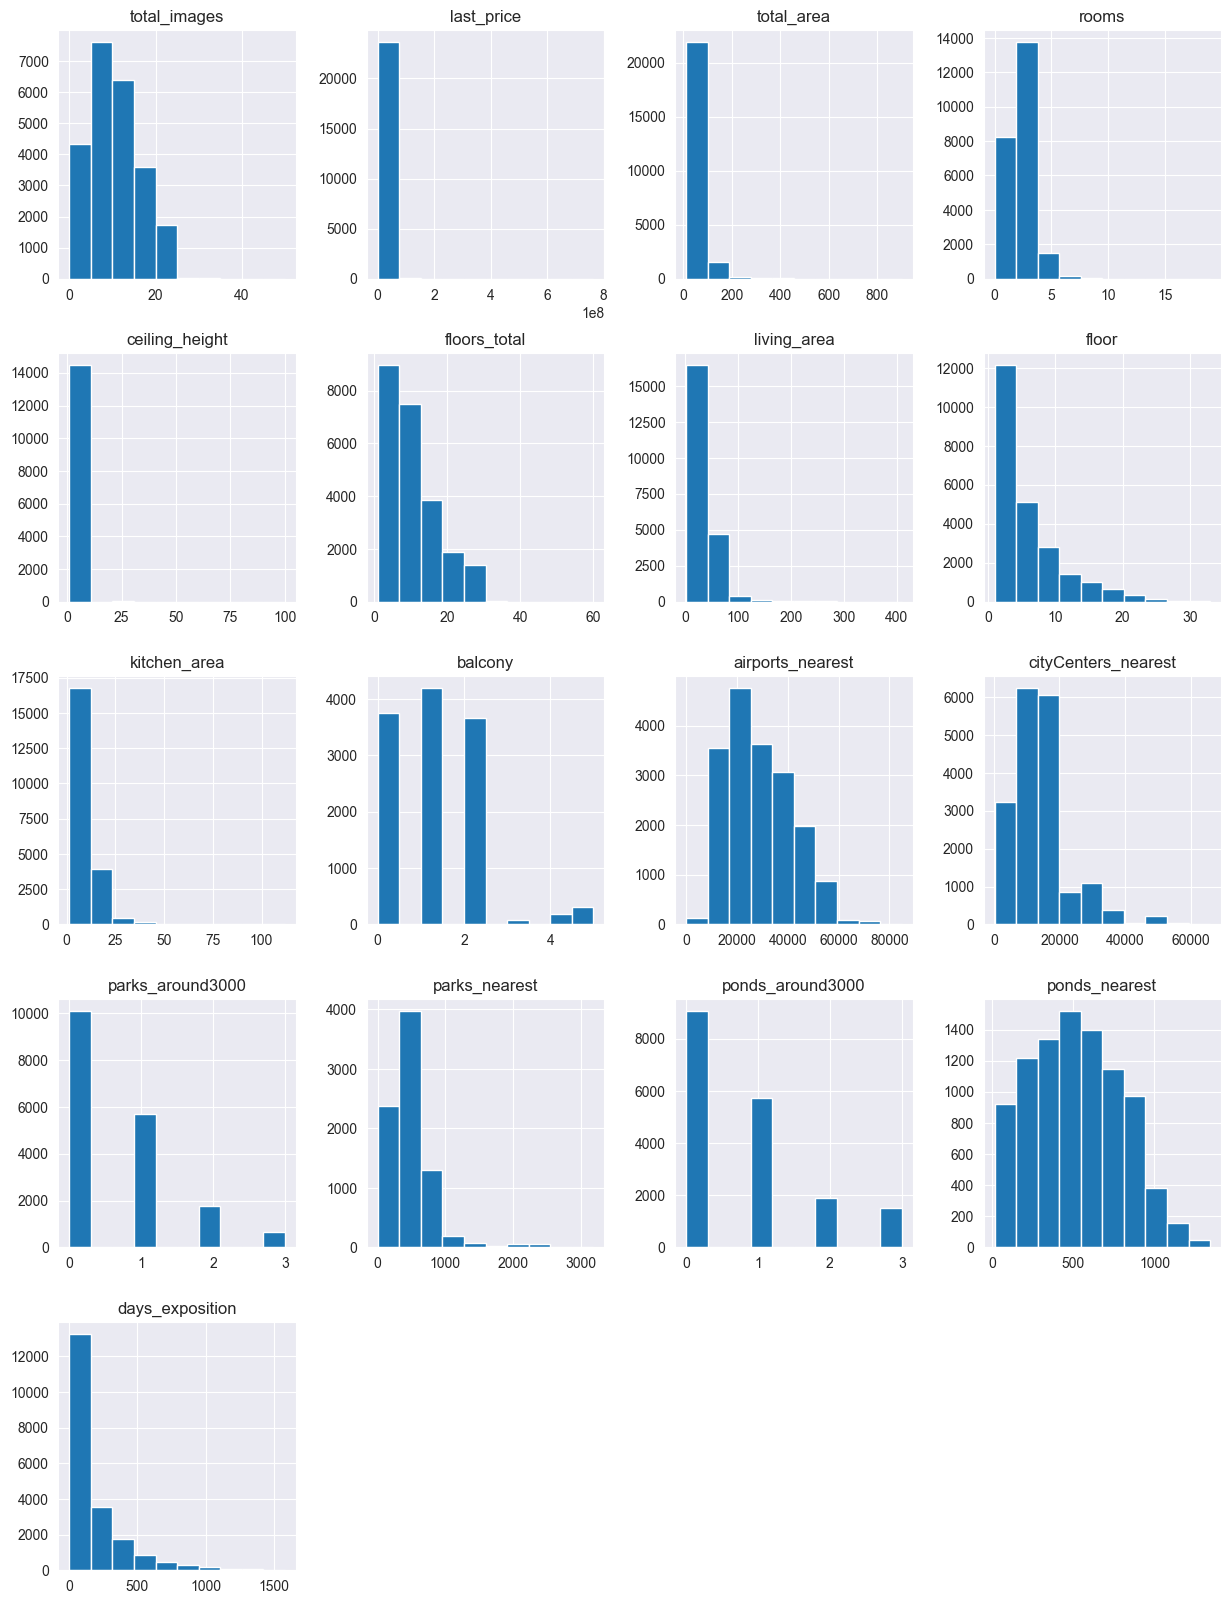

In [6]:
data.hist(figsize=(15, 20));

* At first glance, a normal distribution of the data can be observed. The values are differentiated for the most part. The **last_price** and **ceiling_height** columns are not representative. It is too early to draw any conclusions at this stage, so let's see what we can expect in the further analysis.

### Data preprocessing

#### Identifying and handling the missing values in columns

At first we will check for missing values in our data for all columns. The results will be shown as a percentage of the total sample.

In [7]:
# round the values and convert to integer type

skips = pd.DataFrame(round(data.isna().mean()*100)).astype(int)

# rename the column name

skips.columns = ['Omission rate (%)']

# sort the values in descending order

skips.sort_values(by='Omission rate (%)', ascending=False).style.background_gradient('coolwarm')

,Omission rate (%)
is_apartment,88
parks_nearest,66
ponds_nearest,62
balcony,49
ceiling_height,39
ponds_around3000,23
parks_around3000,23
cityCenters_nearest,23
airports_nearest,23
days_exposition,13


We propose to handle the existing gaps in the individual columns as follows.

Let's consider filling in the empty values with logical substitutions in the columns **ceiling_height, cityCenters_nearest, balcony, is_apartment, living_area**.

Missing values for **ceiling heights** can be replaced by an average value relative to the provided population area:

In [8]:
# go through each locality name in the set of unique values of the locality_name column

for locality_name in data['locality_name'].unique():
    
    # let's calculate the median ceiling height for each area
    
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    
    # in each step of the cycle, depending on the locality, fill in the missing value 
    # height with its median value
    
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median

In those advertisements where the name of the population area is missing, we fill in the blanks in the column with the total median ceiling height value.

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

If possible, we fill in the blanks in the column describing the distance to the centre with the median value depending on the locality:

In [10]:
for locality_name in data['locality_name'].unique():
    
    # calculate the median height of the ceilings for each area and 
    # fill in the missing distance value with its median value
    
    median = data.loc[data['locality_name'] == locality_name, 'cityCenters_nearest'].median()
    data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == locality_name), 'cityCenters_nearest'] = median

Those cells that could not be filled by this method will be left empty. Filling with the median value will not be correct.

We assume, that if the seller has not specified the number of balconies, then the flat does not have any. Let's replace such omissions in the **balcony** column with 0. Similarly, let's replace the omissions in the **is_apartment** column with False (the column is of Boolean type).

In [11]:
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)

For the **living_area** column, we can assume that its value may depend on the other parameters available in the table. Let's see which of them this column is most related to.

In [12]:
data.corr().sort_values(by='living_area', ascending=False)['living_area'].reset_index()

,index,living_area
0,living_area,1.000000
1,total_area,0.939537
2,rooms,0.845977
3,last_price,0.566492
4,kitchen_area,0.428674
5,parks_around3000,0.184453
6,ponds_around3000,0.148933
7,days_exposition,0.142454
8,total_images,0.104780
9,ceiling_height,0.076610


We can note a close linear relationship between **living_area** and such values as **total_area** and **rooms** - the correlation coefficient is close to 1 (values 0.94 and 0.82 respectively). Thus, we can fill in the gaps with median values by category. To do this we will follow the steps described below:

In [13]:
# find the proportion of living space from the total area and store it in a separate variable

data['share'] = data['living_area'] / data['total_area']

# let's construct a summary table to summarise the data on the average share of living space 
# depending on the number of rooms

rooms_stat = data.pivot_table(index='rooms', values='share', aggfunc='median').reset_index()

# let's go through each value of the number of rooms in the set of unique values of the rooms column

for room in data['rooms'].unique():
    
    # at each step of the cycle, using the loc attribute depending on the number of rooms, 
    # fill in the missing value in the living_area column with its corresponding median value
     
    data.loc[data['rooms'] == room, 'living_area'] = \
        (data.loc[data['rooms'] == room, 'living_area'].fillna(data.loc[data['rooms'] == room, 'total_area'] * \
            rooms_stat[rooms_stat['rooms'] == room]['share'].sum()))

For the remaining columns **floors_total, kitchen_area, airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition** due to the limited data set it is not possible to suggest a logical replacement in terms of filling the missing values.

Now we check for gaps in the columns considering the work done.

In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5394
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
share                    1903
dtype: int64

**Conclusion.** We did a preprocessing work on the ceiling_height, balcony, is_apartment, cityCenters_nearest, living_area columns. We left the values blank where it was not possible to fill them, namely in the columns floors_total, kitchen_area, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. In the case of an inappropriate gap-filling method, the results can be highly skewed, and removing rows can make the results less representative. Given this, the choice has been made to ignore gaps in these columns.

***Gaps in the data filled in by users may have arisen for the following reasons:*** users may not have had information on non-obvious features (ceiling height) and may not have had the relevant documentation with them by the time of advertisement placement. In some cases users may deliberately not have filled in the data to avoid pointing out an obvious deficiency and scaring potential buyers. Gaps in the data that are filled in automatically may have been caused by a technical failure or insufficient data for auto-completion.

#### Data type analysis

We should also consider the types of data in each column.

In [15]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
share                   float64
dtype: object

* According to the results obtained, the columns **first_day_exposition** (should be datetime), **floors_total, balcony, days_exposition** (should contain integers) do not match their type. So we convert the data type in the selected columns, except for floors_total and days_exposition columns (there are NaN values). The last_price column can also be converted to integer type for ease of use.

In [16]:
# convert the data type in the date column using to_datetime()

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# replace the real data type with an integer data type using the astype() method

data['balcony'] = data['balcony'].astype('int')
data['last_price'] = data['last_price'].astype('int')

All columns have been converted to the correct data type for convenience and to allow further manipulation of the data, as in the case of datetime.

#### Removing duplicates

Now we will examine the unique values across the column with locality names.

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

* There are duplicates of "поселок Рябово" and "поселок городского типа Рябово", "поселок Тельмана" and "посёлок Тельмана" - these are names of the same settlements. Let's use the find() method to find all settlement types that include "пос" in their names.

In [18]:
duplicate_names = []
for name in data['locality_name'].unique():
    if str(name).find('пос') >= 0:
        duplicate_names.append(name)
duplicate_words = []
for duplicate_name in duplicate_names:
    duplicate_words.append(duplicate_name.rsplit(' ', 1)[0])
set(duplicate_words)

{'городской поселок',
 'городской поселок Большая',
 'городской посёлок',
 'коттеджный поселок',
 'коттеджный поселок Кивеннапа',
 'коттеджный посёлок',
 'поселок',
 'поселок Красная',
 'поселок Лисий',
 'поселок Новый',
 'поселок Пансионат Зелёный',
 'поселок Старая',
 'поселок городского типа',
 'поселок городского типа Большая',
 'поселок городского типа Дружная',
 'поселок городского типа Красный',
 'поселок городского типа имени',
 'поселок станции',
 'посёлок',
 'посёлок Лисий',
 'посёлок Новый',
 'посёлок Пансионат Зелёный',
 'посёлок Платформа 69-й',
 'посёлок Старая',
 'посёлок Форт Красная',
 'посёлок городского типа',
 'посёлок городского типа Красный',
 'посёлок городского типа имени',
 'посёлок при железнодорожной станции',
 'посёлок станции'}

* Now we have a filtered list of unique settlement types. Some of them can be combined into one name "поселок": "городской посёлок", "городской поселок", "поселок городского типа", "посёлок городского типа", "посёлок". This way we will keep the names in the existing column without duplicates.

In [19]:
def replace_duplicate_names(wrong_names, correct_name):
    for wrong_name in wrong_names:
        data['locality_name'] = data['locality_name'].str.replace(wrong_name, correct_name)
replace_duplicate_names(['городской посёлок', 'городской поселок', 'поселок городского типа', \
                         'посёлок городского типа', 'посёлок'], 'поселок')

Let's check the result of this transformation.

In [20]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

Implicit duplicates are now eliminated, we can move on.

#### Dealing with anomalies in the data

Let's check for rare and outlier values. First, using the describe() method, let's look at the main characteristics of the columns we are interested in.

In [21]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height', 'airports_nearest', 'days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,airports_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,18157.000000,20518.000000
mean,60.348651,6.541549e+06,2.070636,2.733877,28793.672193,180.888634
std,35.654083,1.088701e+07,1.078405,1.009388,12630.880622,219.727988
min,12.000000,1.219000e+04,0.000000,1.000000,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.550000,18585.000000,45.000000
50%,52.000000,4.650000e+06,2.000000,2.700000,26726.000000,95.000000
75%,69.900000,6.800000e+06,3.000000,2.700000,37273.000000,232.000000
max,900.000000,7.630000e+08,19.000000,100.000000,84869.000000,1580.000000


* In the **rooms** column the minimum value is 0, which is obviously incorrect. We will replace all zero values with 1.

In [22]:
data['rooms'] = data['rooms'].where(data['rooms'] > 0, 1)

# let's check what we've got

data['rooms'].describe()

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Now we are going to visually determine the normal distribution of values and the presence of outliers in the **last_price, total_area, rooms, ceiling_height** columns by **difference diagram.**

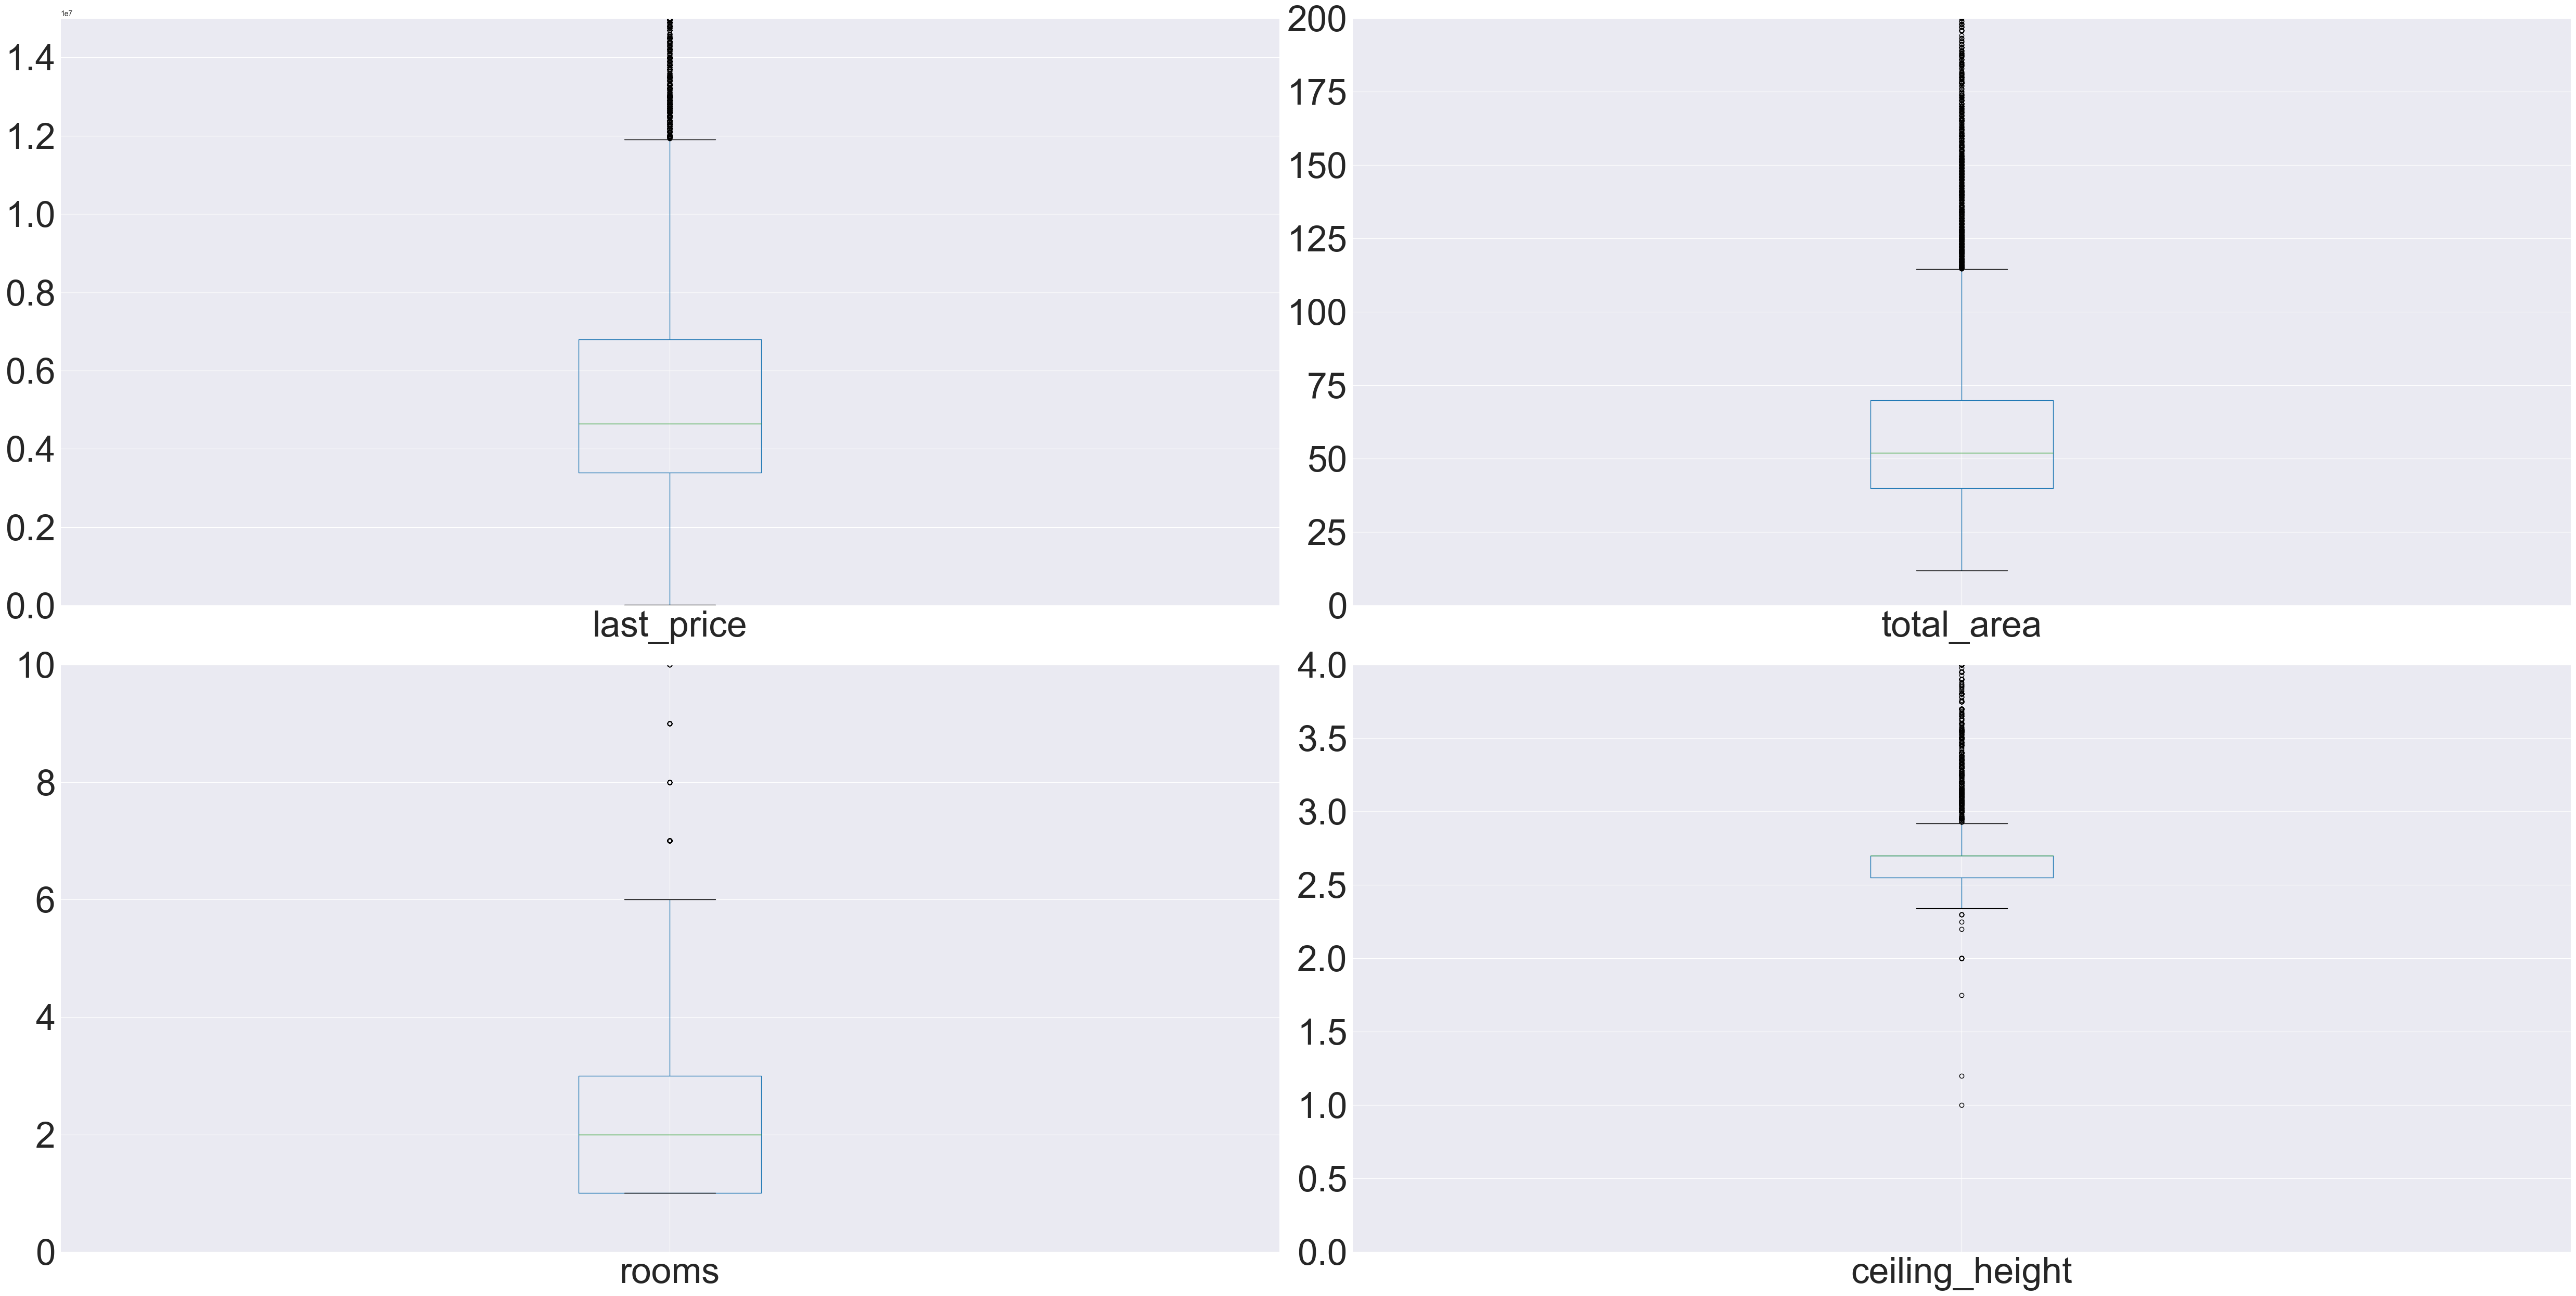

In [23]:
# we use the plt.subplots() method to place the graphs next to each other

_fig, axes = plt.subplots(2, 2, figsize=(50,25))
columns = ['last_price', 'total_area', 'rooms', 'ceiling_height']

# when selecting the maximum values, we focused on the characteristics of the columns

y_max = [15000000, 200, 10, 4]

# Using the loop, we repeat the diagram output for each column

for row in range(2):
    for col in range(2):
        plot_index = row*2+col
        graph = data.boxplot(column=columns[plot_index], ax=axes[row, col], fontsize=50)
        graph.set_ylim([0, y_max[plot_index]])
plt.tight_layout()

The diagrams show, that there are outliers in the columns in question:
 1. **last_price** - normal values are up to 12 million roubles, all others are outliers.
 2. **total_area** - normal values are in the range of 40-120 sq.m.
 3. **rooms** - normal values are in the range up to 6 rooms;
 4. **ceiling_height** - normal values are in the range of 2.5-2.8m.

Let's look at the data in more detail.

In [24]:
# Let's create a function that will output a characteristic and a histogram for the values in the columns, 
# that are part of a normal distribution.

def normal_range(column, bins_hist):
    value = data[column].describe()
    
    # calculation of the inter-quartile range
    
    iqr = value[6] - value[4]  
    
    # range limits
    
    min = value[4] - 1.5 * iqr
    max = value[6] + 1.5 * iqr
    if min < value[3]: 
        min = value[3] 
    if max > value[7]: 
        max = value[7]
    
    # constructing a histogram within the resulting range
    
    data.plot(
        title = ('Histogram ' + column), 
        y = column,
        kind = 'hist', 
        bins = (bins_hist), 
        grid = True, 
        range = ((min), (max)), 
        figsize = (10, 5)
    )
    
    # column characteristic output
    
    display(data[[column]].describe())

* **last_price** (price at the time of advertisement removal).

,conv_last_price
count,23699.000000
mean,6.541549
std,10.887013
min,0.012190
25%,3.400000
50%,4.650000
75%,6.800000
max,763.000000


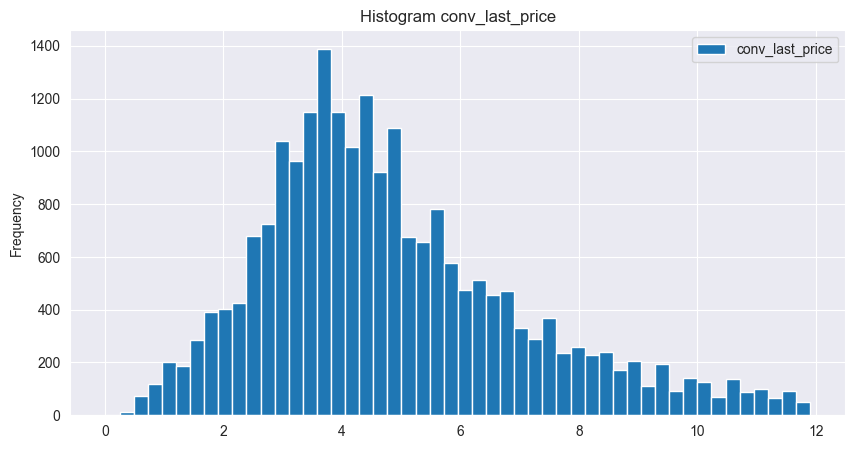

In [25]:
# Convert the data to be able to define the boundaries and convert the values to million roubles. 
# create a separate column for them.

data['conv_last_price'] = data['last_price'] / 1000000
normal_range('conv_last_price', 50)

Excluding abnormal values, housing priced between 12,000 and 12,000,000 roubles can be found in advertisements. Flats are mostly sold in the range between 3 million and 6 million RUB. Then, as the price increases, the number of offers decreases.

In [26]:
# round up the maximum price to 15 million roubles

len(data.query('conv_last_price > 15')) / len(data)

0.050803831385290515

Outliers are **5%** of the total sample. Let's make a cross-section of the data and exclude the outliers.

In [27]:
data = data.query('last_price < 15000000')

In [28]:
# doing a price check above 15 million RUB

data.query('last_price > 15000000')['last_price'].count()

0

* **total_area** (total floor area in square metres (m²)).

,total_area
count,22454.000000
mean,55.121648
std,21.802867
min,12.000000
25%,39.400000
50%,50.105000
75%,65.675000
max,320.000000


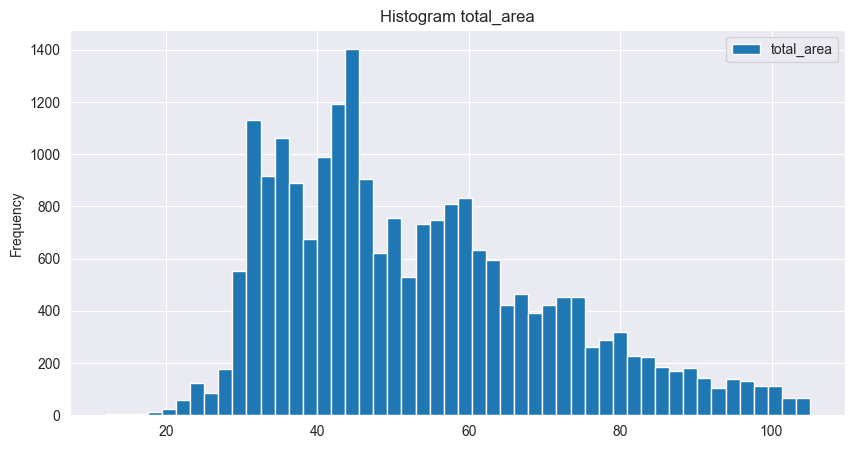

In [29]:
normal_range('total_area', 50)

The total floor area in the sample ranges from 12 sqm to 105 sqm. Most flats are between 30 sqm and 60 sqm, of which aparments of 45 sqm are most common. The average gross floor area is 55 sqm.

In [30]:
# increase the normal range limits to 20 sq m for the lower limit and to 150 sq m for the upper limit

len(data.query('(total_area > 150) or (total_area < 20)')) / len(data)

0.0047207624476707935

The share of outliers is insignificant - **0.5%** of the whole sample. Let's remove the outliers.

In [31]:
data = data.query('total_area > 20 and total_area < 150')

In [32]:
# check for flats of up to 20 sqm and over 150 sqm.

data.query('(total_area > 150) or (total_area < 20)')['total_area'].count()

0

* **rooms** (number of rooms)

,rooms
count,22335.000000
mean,1.975285
std,0.916266
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,7.000000


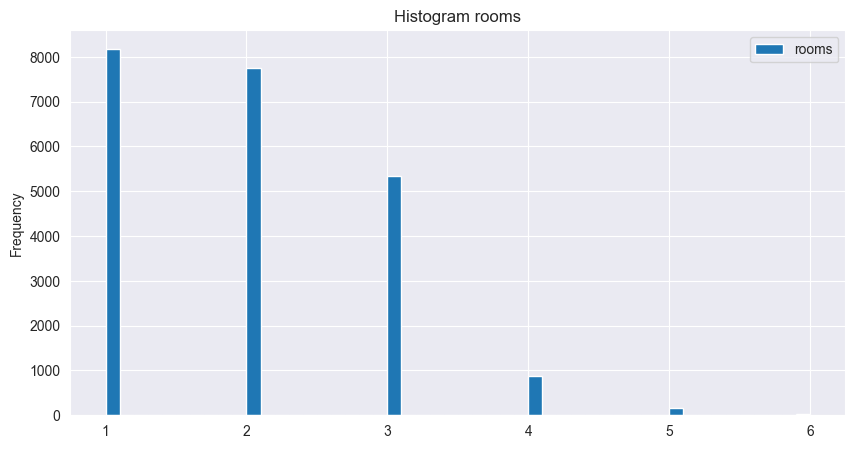

In [33]:
normal_range('rooms', 50)

Within a normal distribution of values, housing consisting of 1 and up to 7 rooms can be found in the listings. One- and two-room flats are the most common. There are considerably fewer offers for flats with 4-7 rooms.

In [34]:
# look at the number of listings for flats with more than 6 rooms

data.query('rooms > 6')['rooms'].count()

2

Now we remove values that fall outside the normal range.

In [35]:
data = data.query('rooms < 6')

In [36]:
# doing a check for flats with more than 6 rooms

data.query('rooms > 6')['rooms'].count()

0

* **ceiling_height** (ceiling height (m))

,ceiling_height
count,22312.000000
mean,2.713095
std,0.802453
min,1.000000
25%,2.550000
50%,2.700000
75%,2.700000
max,32.000000


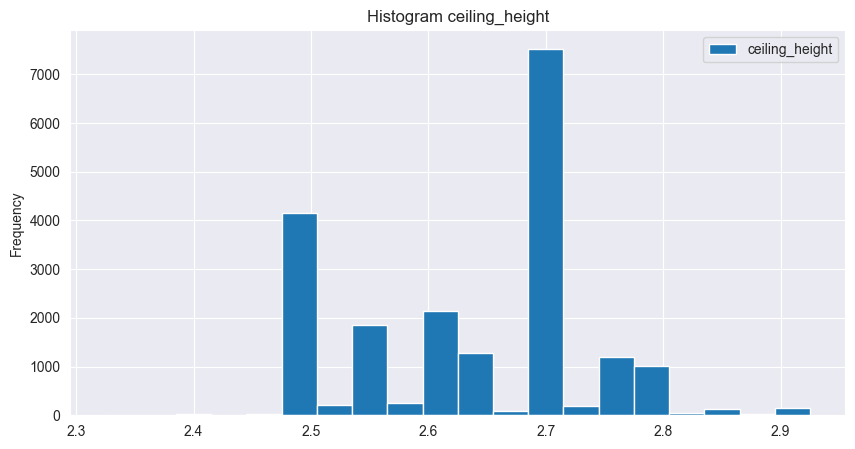

In [37]:
normal_range('ceiling_height', 20)

Most flats have ceilings between 2.5 m and 2.8 m, the most popular being flats with ceilings of 2.7 m. (this is also the average value).

Let's look at the values in the **ceiling_height** column, which are out of the normal distribution. It may be that the data is skewed, and it may be possible to restore it to its correct value.

In [38]:
data.sort_values(by='ceiling_height', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,share,conv_last_price
22336,19,9999000,92.4,2019-04-05,2,32.0,6.0,55.5,5,False,...,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN,0.600649,9.999
3148,14,2900000,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.706667,2.900
21377,19,4900000,42.0,2017-04-18,1,27.5,24.0,37.7,19,False,...,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0,0.897619,4.900
10773,8,3800000,58.0,2017-10-13,2,27.0,10.0,30.1,3,False,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0,0.518966,3.800
2158,15,1500000,42.0,2017-12-23,2,27.0,2.0,29.0,2,False,...,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.690476,1.500


Indeed, where ceiling heights of 32m and 27m are listed, we can assume that these are actually real values of 3.2m and 2.7m. So we will replace such values using the where() method.

In [39]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 10, data['ceiling_height'] / 10)

In [40]:
len(data.query('ceiling_height > 4')) / len(data)

0.001254930082466834

The share of outliers is insignificant - **0.1%** of the whole sample. Let's remove the outliers.

In [41]:
data = data.query('ceiling_height < 4')

In [42]:
# doing a check for flats with ceiling heights above 4

data.query('ceiling_height > 4')['ceiling_height'].count()

0

Let's output the final table with the data characteristics, taking into account the handling of anomalies.

In [43]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height', 'airports_nearest', 'days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,airports_nearest,days_exposition
count,22259.000000,2.225900e+04,22259.000000,22259.000000,16769.000000,19478.000000
mean,54.619109,5.106784e+06,1.970259,2.681810,28898.957899,175.571260
std,20.295448,2.632258e+06,0.906698,0.184972,12896.965261,214.240099
min,20.100000,1.219000e+04,1.000000,1.000000,0.000000,1.000000
25%,39.400000,3.350000e+06,1.000000,2.550000,18233.000000,44.000000
50%,50.000000,4.500000e+06,2.000000,2.700000,26990.000000,92.500000
75%,65.200000,6.231574e+06,3.000000,2.700000,37552.000000,222.750000
max,149.000000,1.500000e+07,5.000000,3.980000,84869.000000,1580.000000


Now we check for obvious duplicates.

In [44]:
# counting obvious duplicates

data.duplicated().sum()

0

No obvious duplicates have been identified.

* The values look correct now and we can move on to the next step.

**Conclusion:** 
The ads for flats with more than 6 rooms or equal to 0 have been excluded. Also the ads with price of flats higher than 150 million roubles, with total area less than 20 sq.m. and more than 150 sq.m., height of a ceiling above 4 m have been excluded.


Based on the offers review results with cleaned up data, it is possible to characterise the flats exhibited in the listings as follows:
  * mainly flats are sold at a price between 3 million RUB and 6 million RUB. The average price is 6.5 million RUB.
  * most flats are sized between 30 sqm and 60 sqm, of which apartments of 45 sqm are most common. The average size is 55 sq.m.
  * there are predominantly one- and two-room flats.
  * most flats have ceilings between 2.5 m and 2.65 m, the most popular variant being flats with 2.65 m ceilings. The average value is 2.7 m.

### Adding new parameters to the table

The next step is to add columns with the following parameters:

In [45]:
# price per square metre

data['price_per_m'] = data['last_price'] / data['total_area']

# day of the week the advertisement is published (0 for Monday, 1 for Tuesday, etc.)

data['day'] = data['first_day_exposition'].apply(lambda x: x.weekday())

# month of posting

data['month'] = data['first_day_exposition'].apply(lambda x: \
                                                   np.datetime64(x).astype('datetime64[M]').astype(int)%12 + 1)

# year of publication of the advertisement

data['year'] = data['first_day_exposition'].dt.year

# type of floor of the flat (values - "ground floor", "top floor", "other floor")

def floor_type(value):
    try:
        if value['floor'] == 1:
            return 'First'
        elif value['floors_total'] == value['floor']:
            return 'Last'
        else:
            return 'Other'
    except:
        pass
data['floor_type'] = data.apply(floor_type, axis = 1)

# distance to the city centre in km (converted from m to km and rounded to whole numbers)

data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

In [46]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,share,conv_last_price,price_per_m,day,month,year,floor_type,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,755.0,NaN,0.472222,13.000,120370.370370,3,3,2019,Other,16.0
1,7,3350000,40.4,2018-12-04,1,2.63,11.0,18.6,1,False,...,NaN,81.0,0.460396,3.350,82920.792079,1,12,2018,First,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,574.0,558.0,0.612500,5.196,92785.714286,3,8,2015,Other,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,48.0,121.0,0.320000,10.000,100000.000000,1,6,2018,Other,8.0
5,10,2890000,30.4,2018-09-10,1,2.60,12.0,14.4,5,False,...,NaN,55.0,0.473684,2.890,95065.789474,0,9,2018,Other,NaN


### Exploratory data analysis

#### Parameter analysis

Let's continue the analysis of the remaining table parameters within a normal distribution of values.

* **living_area** (living space in square metres (m²))

,living_area
count,22259.000000
mean,31.320512
std,14.185586
min,2.000000
25%,18.400000
50%,29.700000
75%,40.000000
max,128.000000


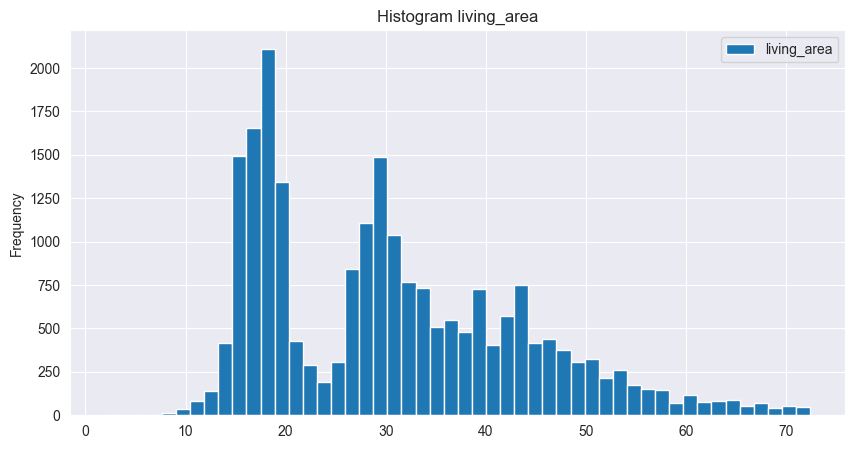

In [47]:
normal_range('living_area', 50)

Flats with a living area of up to 128 sqm are listed. Among them most of the properties have a living area of 15 sqm to 45 sqm. The average is 31 sqm.

,kitchen_area
count,20156.000000
mean,9.841013
std,4.182226
min,1.300000
25%,7.000000
50%,9.000000
75%,11.200000
max,64.000000


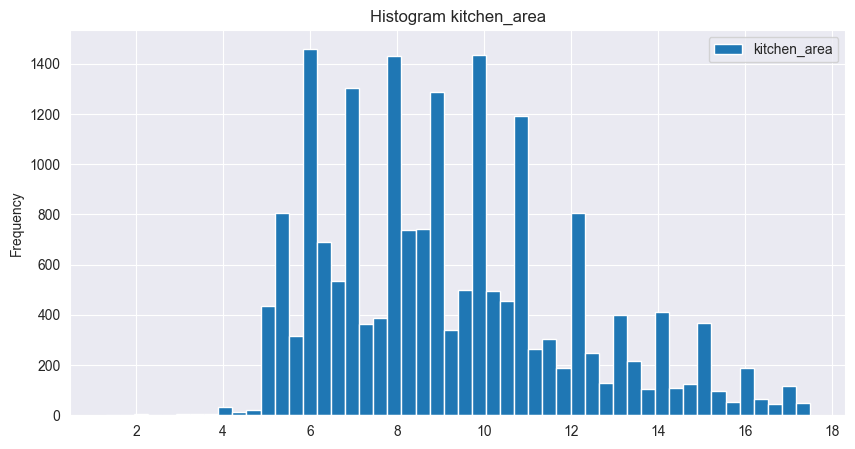

In [48]:
normal_range('kitchen_area', 50)

The most common sizes of kitchens in flats in Saint Petersburg and surrounding areas range from 6 to 12 sqm. The average value is 9.8 sqm.

* **floor**

,floor
count,22259.000000
mean,5.914731
std,4.916447
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,33.000000


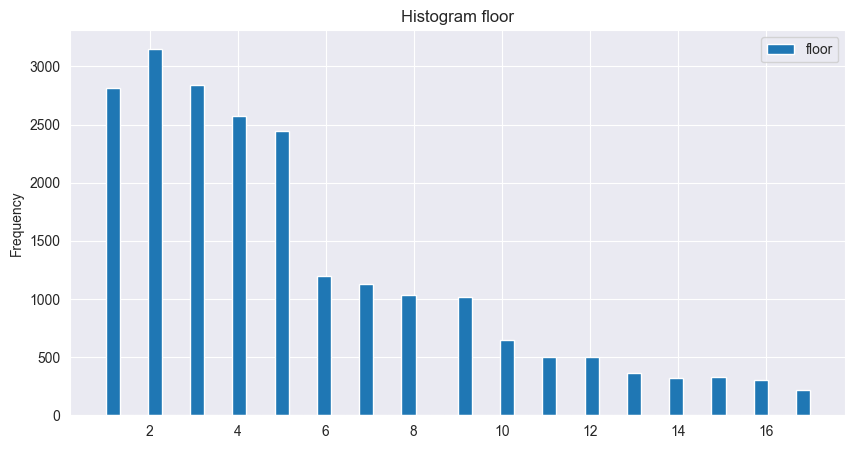

In [49]:
normal_range('floor', 50)

Floors in the sample are represented by values ranging from 1 to 33. Most flats are on floors 1-5.

* **floor_type**

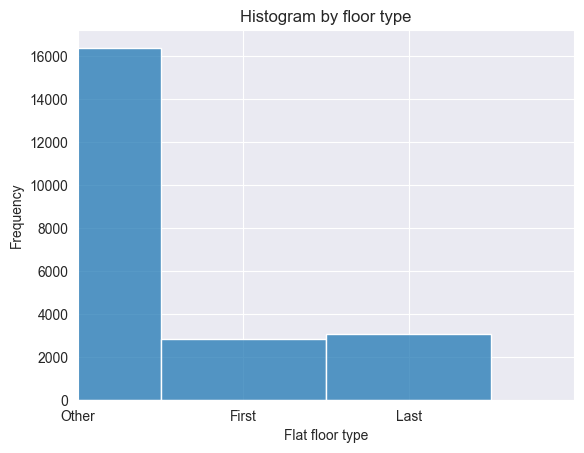

In [50]:
sns.histplot(x=data['floor_type'], kde=False, bins=5)
plt.xlim(0, 3)
plt.title('Histogram by floor type')
plt.xlabel('Flat floor type')
plt.ylabel('Frequency')
plt.show()

Most of the flats are not on the ground floor or the top floor. Flats on the top floor are more common than those on the ground floor.

* **floors_total**

,floors_total
count,22179.000000
mean,10.798097
std,6.648472
min,1.000000
25%,5.000000
50%,9.000000
75%,16.000000
max,60.000000


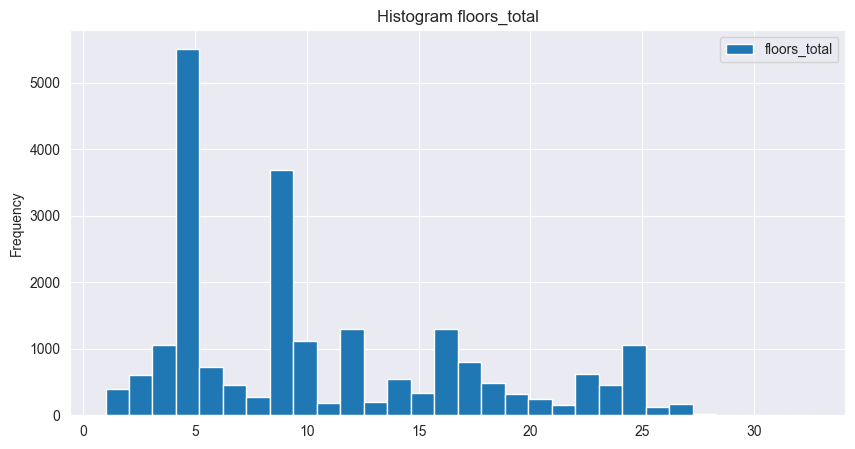

In [51]:
normal_range('floors_total', 30)

As in most other regions, there are more five-storey and nine-storey houses.

* **cityCenters_nearest**

,cityCenters_nearest
count,16892.000000
mean,14791.961076
std,8547.166068
min,208.000000
25%,10337.000000
50%,13460.000000
75%,16638.000000
max,65968.000000


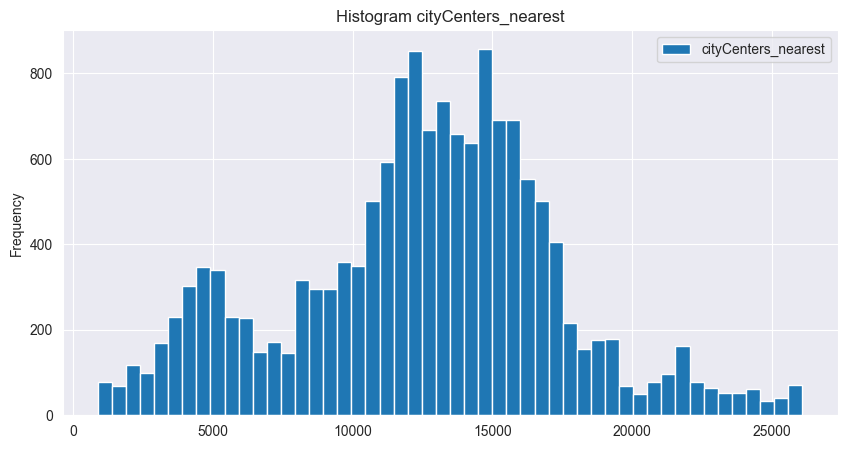

In [52]:
normal_range('cityCenters_nearest', 50)

Most of the property offers are located about 10-18 km from the centre. The average is 15 km.

* **airports_nearest**

,airports_nearest
count,16769.000000
mean,28898.957899
std,12896.965261
min,0.000000
25%,18233.000000
50%,26990.000000
75%,37552.000000
max,84869.000000


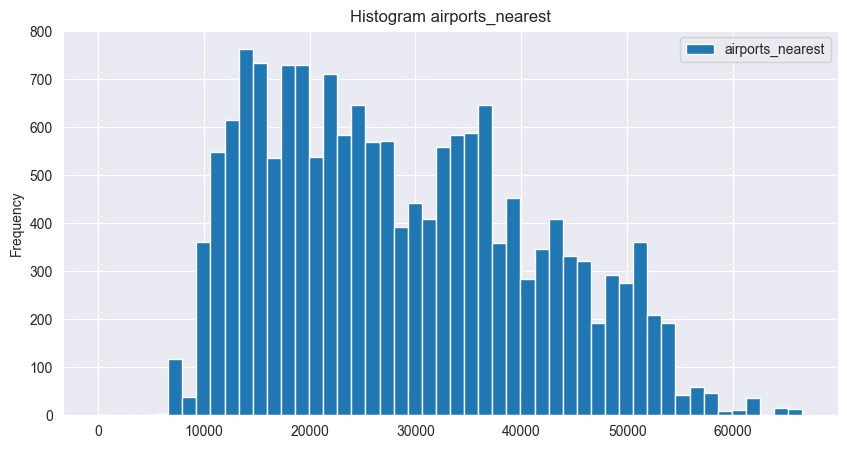

In [53]:
normal_range('airports_nearest', 50)

Flats are mostly located between 12 and 45 km from the airport, more often between 15 and 20 km. The average distance is 29 km.

* **parks_nearest**

,parks_nearest
count,7109.000000
mean,491.553805
std,335.492275
min,1.000000
25%,290.000000
50%,456.000000
75%,614.000000
max,3190.000000


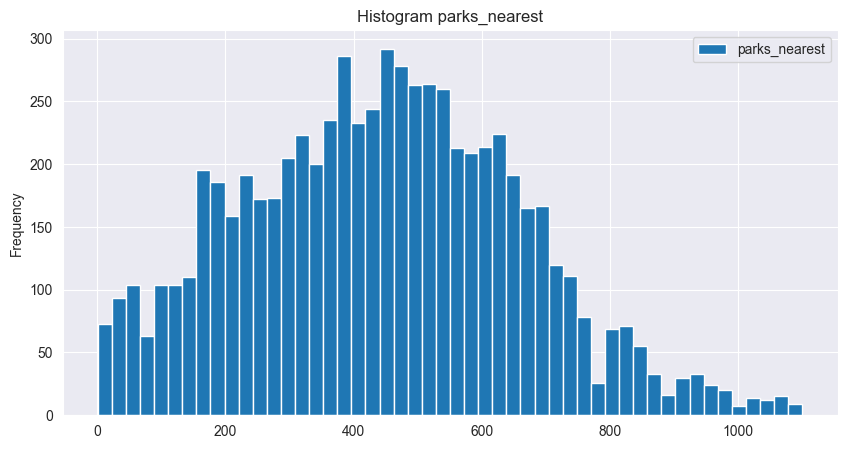

In [54]:
normal_range('parks_nearest', 50)

In most cases, flats are located close to parks - in the range of 200-600 metres. Flats are most often located in relation to the nearest park at a distance of 400-450 metres, with an average of 500 metres.

* **day** (day of the week when the advertisement was published)

,day
count,22259.000000
mean,2.573566
std,1.793679
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,6.000000


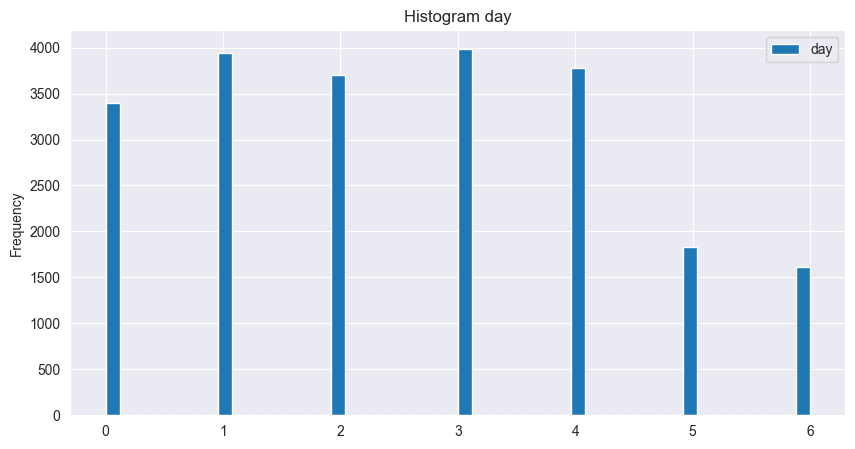

In [55]:
normal_range('day', 50)

According to the data, advertisements are more often placed between Monday and Friday. People are mostly resting on weekends, and responsible tasks are more likely to be carried out on weekdays.

* **month** (month of advertisement publication)

,month
count,22259.000000
mean,6.398580
std,3.488269
min,1.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,12.000000


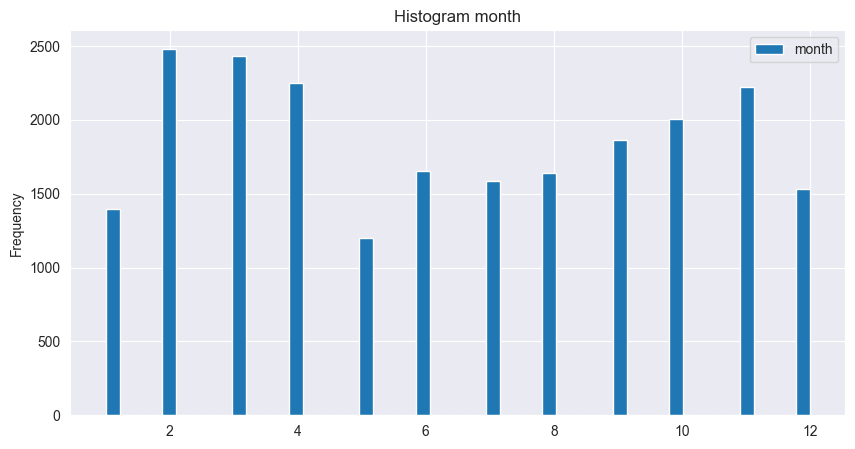

In [56]:
normal_range('month', 50)

The real estate market spikes during the spring and autumn months. The most popular months are February to April and September to November. By February, people are recovering from the New Year holidays, and in autumn they are feeling rested after their vacations and ready to make changes in their lives (to move, for example). Statistically, May is the most inactive month.

**Conclusion.** According to the results of the study of the parameters of flats for sale, the real estate market in St. Petersburg and neighbouring localities can be described as follows:

* most of the real estate is offered **with a living area between 15 sq.m. and 45 sq.m.**, of which flats with an area of 18 sq.m. are the most common, **the average is 31 sq.m.**;

* the **kitchens** in flats are mainly **6 to 12 sq.m.** large, **the average is 9.8 sq.m.**;

* most of the flats are on **1-5 floors**;

* in terms of floor types, most flats are not on the ground floor or the top floor. However, flats on the top floor are more common than on the ground floor;

* there are more **5-storey and 9-storey houses**;

* on the average there are more offers of properties located **10-18 km. from the centre (average distance - 15 km.) and 12-45 km. from the airport, more often - 15 and 20 km. (average distance - 29 km.)**;

* in most cases the flats are within **200-600 metres** from parks;

* listings are more often placed from Monday to Friday, the peak of business activity in the real estate market is in the spring and autumn period. The most popular months are February to April and September to November. Statistically, May is the least active month.

#### Analysis of the selling speed of a property

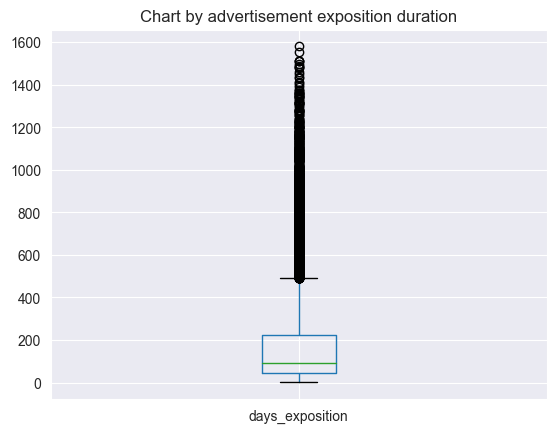

In [57]:
# let's look at the distribution of values by plotting a spread diagram

data.boxplot(column='days_exposition')
plt.title('Chart by advertisement exposition duration');

Abnormal values (unusually long sales) occur over a period of more than one year. We will consider data without outliers within a normal distribution.

,days_exposition
count,19478.000000
mean,175.571260
std,214.240099
min,1.000000
25%,44.000000
50%,92.500000
75%,222.750000
max,1580.000000


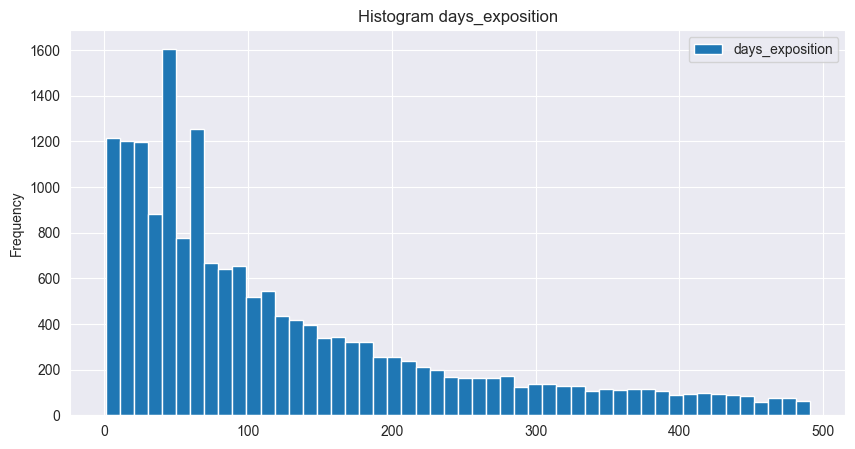

In [58]:
normal_range('days_exposition', 50)

The average is 180 days and the median is 95 days. In the graph we observe that flats are most often sold within the first 3 months from the date of listing, the category "very fast" can include sales within 45 days. As the number of days of listing increases, the number of listings decreases. There are some outliers in the period up to 100 days, some of them are related to the fact, that according to Yandex Real Estate rules the ads are automatically removed from publication after 45 and 60 days. Let's get rid of these values.

In [59]:
data = data.query('days_exposition not in [45, 60]')

#### Determine the factors affecting the overall value of the site

In [60]:
# price correlation between all parameters

data.corr()['last_price']

total_images              0.160872
last_price                1.000000
total_area                0.741460
rooms                     0.470297
ceiling_height            0.417569
floors_total              0.162958
living_area               0.621894
floor                     0.116512
is_apartment              0.023689
studio                   -0.062268
open_plan                -0.040990
kitchen_area              0.529879
balcony                   0.065742
airports_nearest         -0.037015
cityCenters_nearest      -0.359911
parks_around3000          0.136619
parks_nearest             0.045039
ponds_around3000          0.157166
ponds_nearest            -0.062702
days_exposition           0.110356
share                     0.019867
conv_last_price           1.000000
price_per_m               0.640801
day                      -0.014534
month                     0.004201
year                     -0.016058
cityCenters_nearest_km   -0.360604
Name: last_price, dtype: float64

Для наглядности визуализируем корреляционную матрицу с помощью тепловой карты.

Let's visualise the correlation matrix using a heat map for clarity.

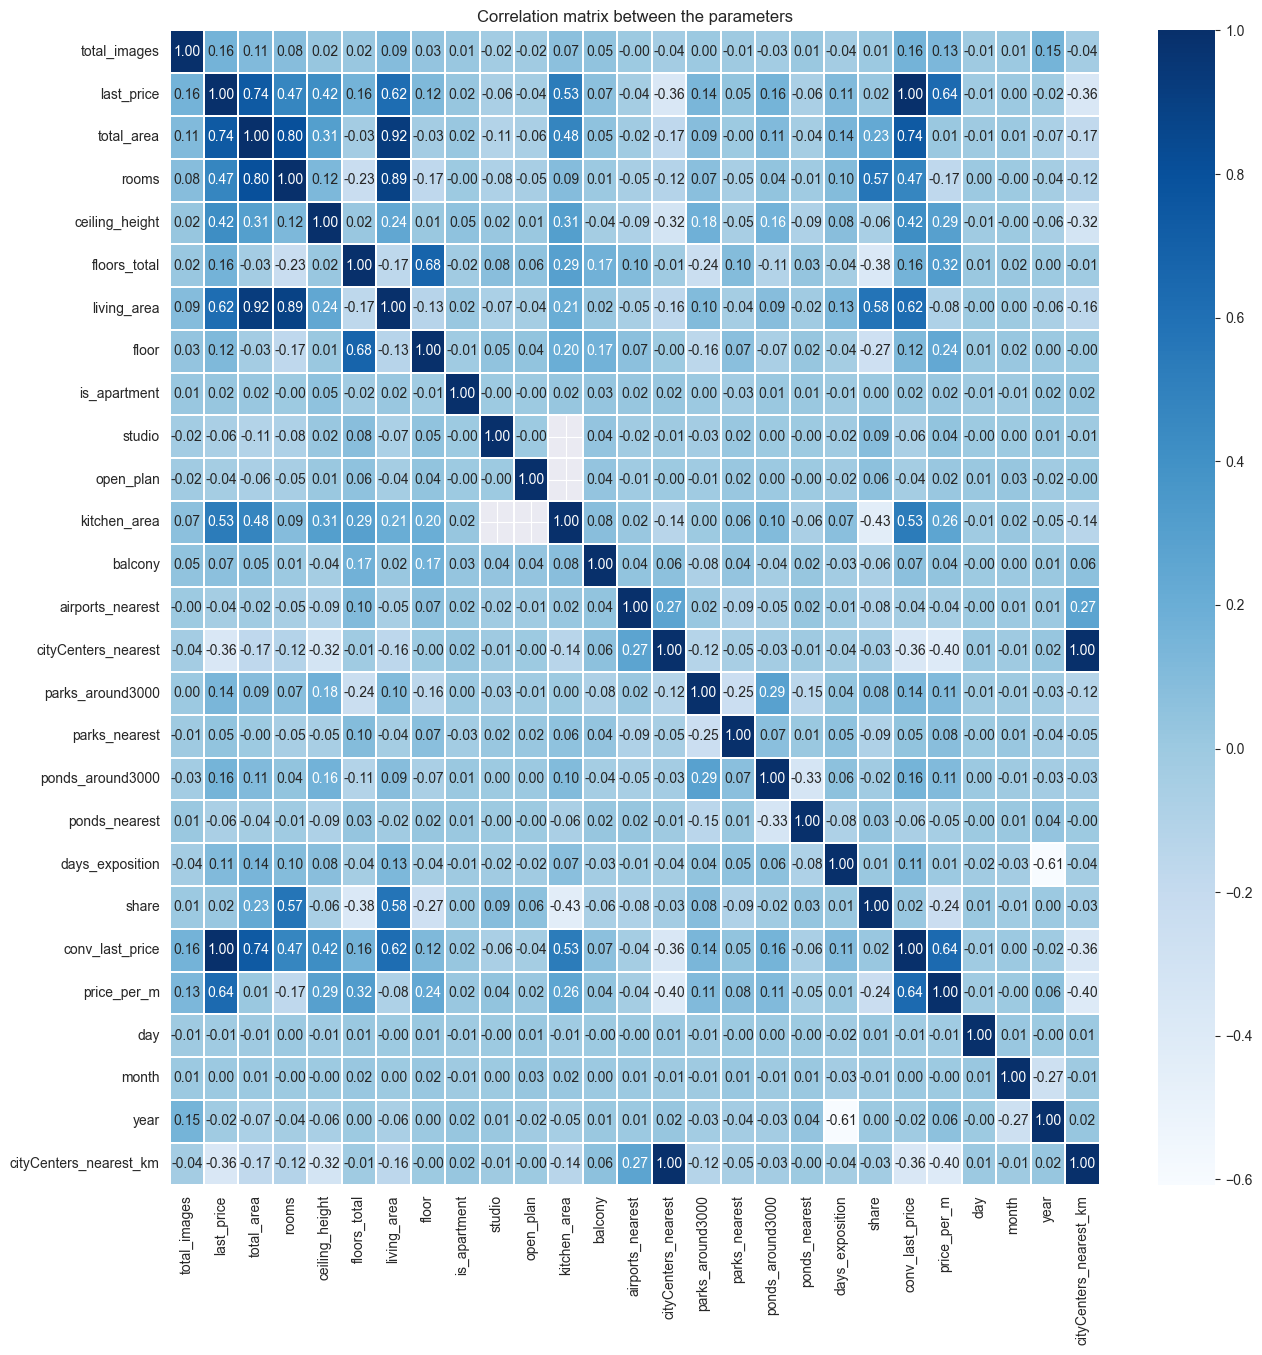

In [61]:
# the graph shows relationships between the variables

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), linewidths=.3, ax=ax, annot=True, cmap="Blues", fmt='.2f')
plt.title('Correlation matrix between the parameters')
plt.show()

According to the matrix, the **strongest correlation with the price** is traced for such parameters as **total area** (correlation coefficient 0.74), **living area** (0.62) and **kitchen area** (0.53) - these indicators are in direct correlation. The correlation between the price and the number of rooms (0.47) is a bit lower - this can be explained by the fact that the area of each single room is always different, so the biggest indicator is the total area of the flat and the height of the ceilings (0.39). There is also a slight correlation between the price and the distance to the centre: the negative correlation coefficient is (-0,36) - the further the distance to the centre, the lower the price of the flat. 

The results obtained look quite logical. Next, let's take a closer look at the dependence of the price on:
* total area;
* living space;
* kitchen area;
* floor on which the flat is located (first, last, other);
* date of accommodation (day of week, month, year).

Let's build graphs that will show the dependence of the price on the above parameters. We will use summary tables to prepare the data before visualisation.

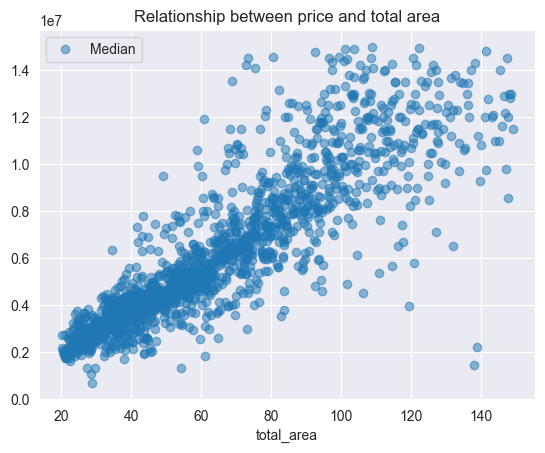

In [62]:
total_area_pivot = data.pivot_table(index = 'total_area', values = ['last_price'], \
                                    aggfunc = ['mean', 'count', 'median'])
total_area_pivot.columns = ['Mean','Count','Median']
total_area_pivot.plot(y = 'Median', style = 'o', alpha=0.5, title = 'Relationship between price and total area');

The graph shows a direct correlation between the price and the floor area - the bigger the floor area, the higher the price.

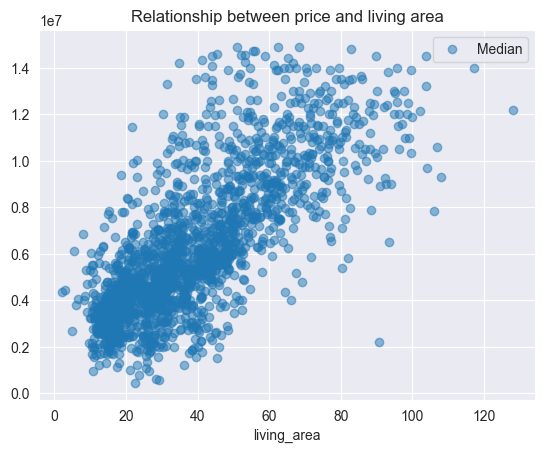

In [63]:
living_area_pivot = data.pivot_table(index = 'living_area', values = ['last_price'], \
                                     aggfunc = ['mean', 'count', 'median'])
living_area_pivot.columns = ['Mean','Count','Median']
living_area_pivot.plot(y = 'Median', style = 'o', alpha=0.5, title = 'Relationship between price and living area');

The situation is similar with the living area.

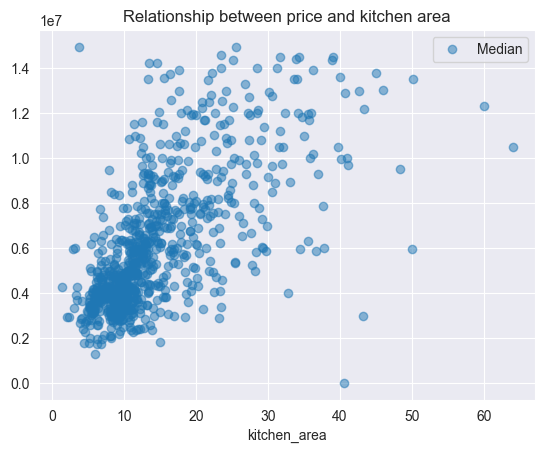

In [64]:
kitchen_area_pivot = data.pivot_table(index = 'kitchen_area', values = ['last_price'], \
                                      aggfunc = ['mean', 'count', 'median'])
kitchen_area_pivot.columns = ['Mean','Count','Median']
kitchen_area_pivot.plot(y = 'Median', style = 'o', alpha=0.5, \
                        title = 'Relationship between price and kitchen area');

The kitchen area has slightly less influence on cost, but there is still a direct correlation.

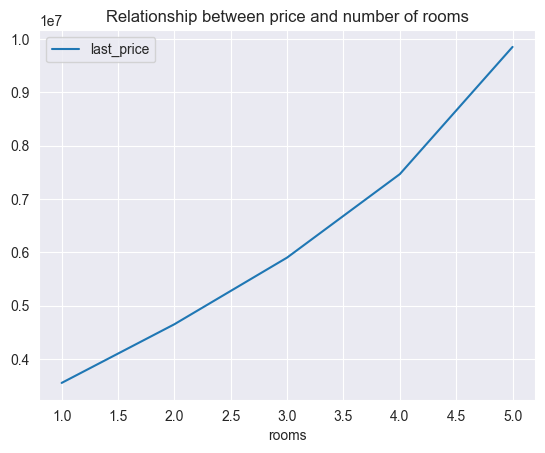

In [65]:
room_pivot = data.pivot_table(index = 'rooms', values = ['last_price'], aggfunc = ['mean', 'count', 'median'])
room_pivot.plot(y = 'median', title = 'Relationship between price and number of rooms');

There is also a correlation between the price and the number of rooms - the higher the number, the higher the price.

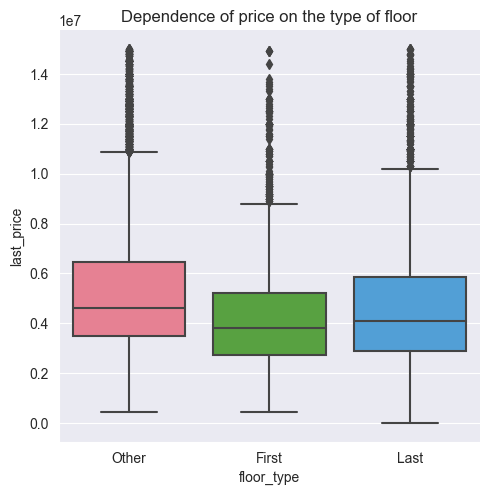

In [66]:
sns.catplot(data=data, x='floor_type', y="last_price", kind="box", palette='husl')
plt.title('Dependence of price on the type of floor');

The price of housing is also influenced by the type of floor: the price on the ground floor is lower than on the top floor and any other floors. Flats are often more expensive if they are on floors other than the ground floor and the top floor.

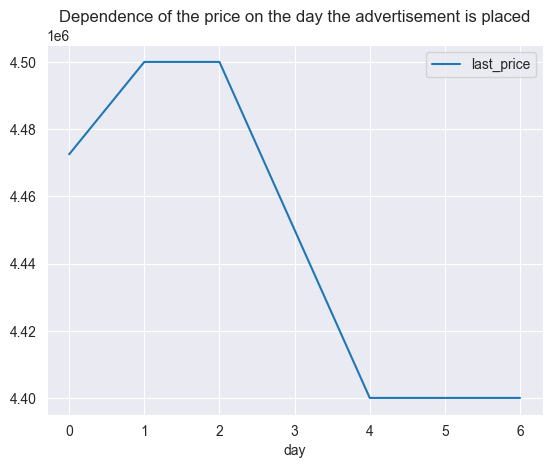

In [67]:
room_pivot = data.pivot_table(index = 'day', values = ['last_price'], aggfunc = ['mean', 'count', 'median'])
room_pivot.plot(y = 'median')
plt.title('Dependence of the price on the day the advertisement is placed');

Flats for which advertisements have been published from Monday to Wednesday are more expensive. Their prices go down by the weekend. It is possible that in some cases prices may have fallen gradually after a period of time when it was not possible to close the deal at the original price (the price in our dataset is given at the time the listing was taken off the market). Seller activity is generally low on weekends.

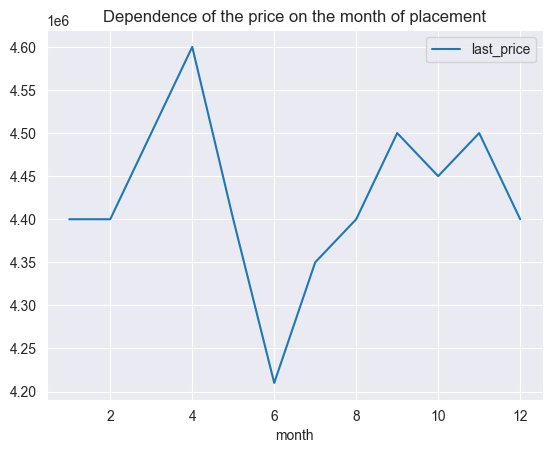

In [68]:
room_pivot = data.pivot_table(index = 'month', values = ['last_price'], aggfunc = ['mean', 'count', 'median'])
room_pivot.plot(y = 'median')
plt.title('Dependence of the price on the month of placement');

The effect of the month in which a property is published on the price of the property can also be seen. In summer, sellers reduce the price of properties in their listings, which is most likely due to the holiday period and a decrease in buyer demand. In the autumn, the price of housing is set higher when there is more business activity on the market.

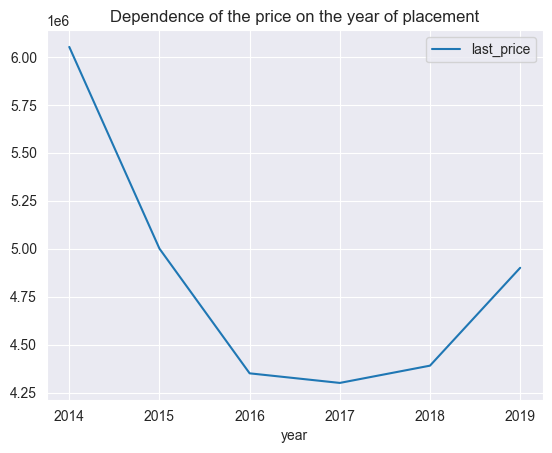

In [69]:
room_pivot = data.pivot_table(index = 'year', values = ['last_price'], aggfunc = ['mean', 'count', 'median'])
room_pivot.plot(y = 'median')
plt.title('Dependence of the price on the year of placement');

The graph shows that there is a decreasing trend in the average price of housing between 2014 and 2017. However, it should be taken into account that there is a close correlation between price and gross floor area of flats. Therefore, this trend may not be caused by a decrease in prices, but by a reduction in the total area of flats sold. For this purpose, let us draw a graph that shows how the area of flats sold has changed in the analysed periods.

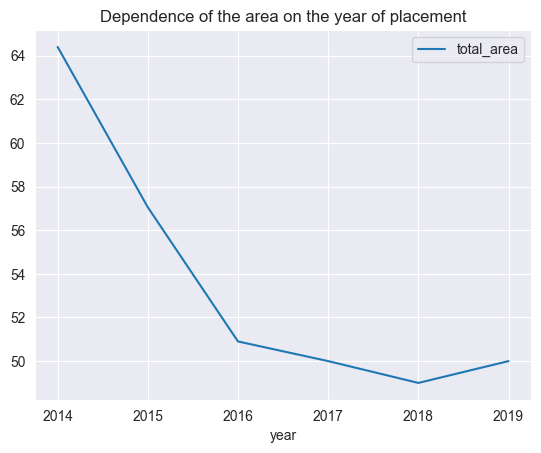

In [70]:
room_pivot = data.pivot_table(index = 'year', values = ['total_area'], aggfunc = ['mean', 'count', 'median'])
room_pivot.plot(y = 'median')
plt.title('Dependence of the area on the year of placement');

The graph confirms our hypothesis - the decrease in the average price of housing between 2014 and 2017 is linked to a reduction in the total area of flats for sale.

**Conclusion.** 
Factors that have the greatest impact on property values are: size of property, number of rooms, height of ceilings and distance from the centre. In addition, there is a correlation of price with the type of floor and the date of publication. These findings are justified by the following.

There is a direct correlation between the price of the property (total floor area, living space and kitchen area), the number of rooms, the ceiling height - the higher the value of these parameters, the higher the price for the property. There is a negative correlation between the value of the property and its remoteness from the centre - the lower the distance from the centre, the higher the price. In cases where flats are located on the ground floor and top floor, their price is usually cheaper than on any other floor. Flats for sale advertised from Monday to Wednesday, during the spring and autumn periods, are more expensive.

#### Analysis of the cost per square metre in the 10 localities with the highest number of advertisements. 

Now we are going to calculate the average price per sqm for each location and select the first 10 locations with the highest number of listings. We can perform these steps by accessing the pivot_table () method.

In [71]:
top_10 = data.pivot_table(index = 'locality_name', values = 'price_per_m', \
                          aggfunc = ['count', 'median']).astype('int64')
top_10.columns = ['Number of advertisements', 'Average price per sq m.']
top_10_filt = top_10.sort_values('Number of advertisements', ascending=False).head(10)
top_10_filt

,Number of advertisements,Average price per sq m.
locality_name,,
Санкт-Петербург,13958,102816
поселок Мурино,545,85714
поселок Шушары,428,76666
Всеволожск,387,65648
Пушкин,339,98601
Колпино,330,74729
поселок Парголово,314,91847
Гатчина,299,67695
деревня Кудрово,286,91930


The settlement with the highest cost per square metre:

In [72]:
# the highest price per square metre

top_10[top_10['Average price per sq m.']==top_10['Average price per sq m.'].max()]

,Number of advertisements,Average price per sq m.
locality_name,,
Санкт-Петербург,13958,102816


The settlement with the lowest cost per square metre:

In [73]:
# the lowest price per sq m of the top 10

top_10_filt[top_10_filt['Average price per sq m.']==top_10_filt['Average price per sq m.'].min()]

,Number of advertisements,Average price per sq m.
locality_name,,
Выборг,230,58001


**Conclusion.** St. Petersburg is the city with the highest cost of housing (107 thousand roubles per sq. m.), while Vyborg provides the lowest cost of housing respectively (58 thousand roubles per sq. m.).

#### Influence of distance to the city centre on the value of properties in St. Petersburg.

Let's highlight flats in St. Petersburg using the locality_name column and calculate the average price of each kilometre.

In [74]:
apart_sp = data[data['locality_name'] == 'Санкт-Петербург']

In [75]:
# price per km

apart_sp['price_per_km'] = apart_sp['last_price'] / apart_sp['total_area']

We will also assess the relationship between the value of a property and its distance from the city centre.

In [76]:
apart_sp['cityCenters_nearest_km'].corr(apart_sp['price_per_km'])

-0.3037109862763495

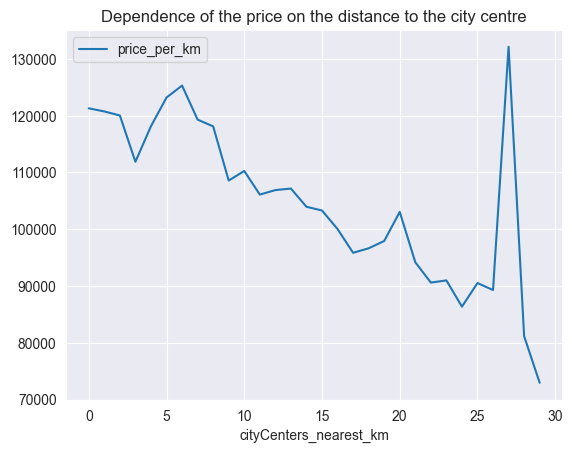

In [77]:
apart_pivot = apart_sp.pivot_table(index = 'cityCenters_nearest_km', values = ['price_per_km'], \
                                   aggfunc = ['mean', 'count', 'median'])
apart_pivot.plot(y = 'mean')
plt.title('Dependence of the price on the distance to the city centre');

**Conclusion.** There is a negative correlation (-0.3) between the values - the closer to the centre a flat in St. Petersburg is located, the higher its price.

### General conclusion

We have studied an archive of advertisements for flats in St. Petersburg and neighbouring localities for the period from 2014 to 2019.
There was additionally carried out work in terms of data processing, namely: 

✔️ we have filled in missing values where possible (in columns ceiling_height, balcony, is_apartment, cityCenters_nearest, living_area); 

✔️ the data types in the individual columns (first_day_exposition, balcony, last_price) have been converted; 

✔️ implicit duplicates in the names of settlements as well as rare and extreme values have been eliminated (the ads for flats with more than 6 rooms or equal to 0, with the price of flats over 150 million roubles, and with the total area less than 20 sq. m and more than 150 sq. m, with the ceiling height over 4 m have been excluded);

✔️ we have calculated new parameters for more accurate analysis and added them to the overall table: price per square meter; day of the week of publication of the advertisement; month and year of publication of the advertisement; type of floor of the flat; distance to the city centre in km.

Next, all flat parameters have been studied using the data visualisation method.

Thus, the real estate market in St. Petersburg and neighbouring localities is represented as follows:

* mainly flats are sold **at a price** between 3 million and 6 million RUB, the average price is **6.5 million RUB**;
* most of flats' measured areas **square-meters** range from 30 sq.m. to 60 sq.m., average size - **55 sq.m.**; 
* **one- and two-room apartments** are sold most often;
* the most popular variant of flats indicates a **ceilings height** of 2,65 m, average value - **2,7 m**; 
* most properties have a **living space** between 15 sqm and 45 sqm, average value - **31 sqm**;
* **kitchens** in flats are mainly **6 to 12 sq.m.** big, the average value is **9.8 sq.m.**;
* more flats are on **1-5 floors**;
* more often flats are on **other floors**, than on either the ground or the last one. And there are more flats on the top floor than on the ground floor;
* most of the buildings are either **5-storey** or **9-storey** houses;
* on average, most of the properties are located 10-18km away **from the centre** (average distance is **15km**) and 12-45km away from the **airport** (average distance is **29km**);
* in most cases, flats are within **200-600 metres** distance **from parks**;
* **Monday through Friday**; **Spring and Fall** are the most popular periods for real estate market activity. The most popular months are February to April and September to November. Statistically, May is the least active month.

The average exposure time is 180 days. Most often flats are sold within the first 3 months from the date of placement, the category "very fast" includes sales within 45 days, "unusually long sales" - more than one year.

The influence of different factors on the property price has been studied.

The largest correlation with the price is traced for such parameters as: the total area (correlation coefficient 0.74), living space (0.62) and kitchen area (0.53) - the indicators have direct correlation. The correlation between the price and the number of rooms is less prominent (0,47) - this can be explained by the fact that the area of each single room is always different, so the biggest indicator is still the total area of the flat, and the height of the ceilings (0,39). There is a minor correlation between the price and the distance to the centre: the negative correlation coefficient is (-0,36) - the greater the distance to the centre, the lower the price of the flat.
Prices are also influenced by the type of floor and the date of location: in cases where flats are located on the first or top floor, they tend to be cheaper than on any other floor. Flats for sale advertised from Monday to Wednesday, during the spring and autumn periods, are more expensive.